In [65]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge

In [66]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'

In [67]:
df = pd.read_csv(filepath, header=0)

In [68]:
df.head(3)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.528,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.851,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.851,946,Low,1,0


In [69]:
df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace=True)

In [70]:
df.head(3)

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.528,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.851,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.851,946,Low,1,0


## Using Cross Validation To Improve the model


In [71]:
y_data = df['Price']
x_data = df.drop(['Price'], axis=1)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.10, random_state=1)
print(f"Number of test Samples {x_test.shape[0]}")
print(f"Number of train sample {x_train.shape[0]}")

Number of test Samples 24
Number of train sample 214


In [73]:
lr = LinearRegression()
lr.fit(x_train[['CPU_frequency']], y_train)
print(lr.score(x_test[['CPU_frequency']], y_test))
print(lr.score(x_train[['CPU_frequency']], y_train))

-0.06599437350393811
0.14829792099817984


In [74]:
rcross = cross_val_score(lr, x_data[['CPU_frequency']], y_data, cv=4)
print(
    f"The Mean Value of the folds are  :     {rcross.mean()} \nThe standard deviation is        :      {rcross.std()}")

The Mean Value of the folds are  :     -0.16109232388595096 
The standard deviation is        :      0.3849579786664708


## Overfitting


In [75]:
rsqu = []
order = [1, 2, 3, 4, 5]

for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
    lr.fit(x_train_pr, y_train)
    rsqu.append(lr.score(x_test_pr, y_test))

Text(0.5, 1.0, 'R^2 Using Test Data')

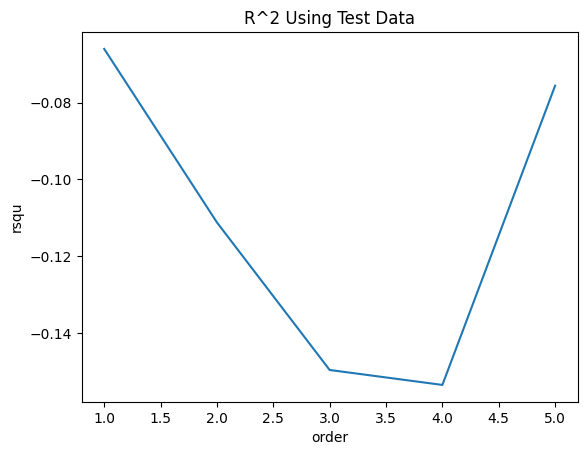

In [76]:
plt.plot(order, rsqu)
plt.xlabel("order")
plt.ylabel('rsqu')
plt.title("R^2 Using Test Data")

# Ridge Regression


In [77]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(
    x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr = pr.fit_transform(
    x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

In [78]:
rsqu_test = []
rsqu_train = []

Alpha = np.arange(0.001, 1, 0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(
        x_train_pr, y_train), RigeModel.score(x_test_pr, y_test)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    rsqu_test.append(test_score)
    rsqu_train.append(train_score)

100%|██████████| 999/999 [00:11<00:00, 87.71it/s, Test Score=0.634, Train Score=0.371] 


(0.0, 0.6697284047163478)

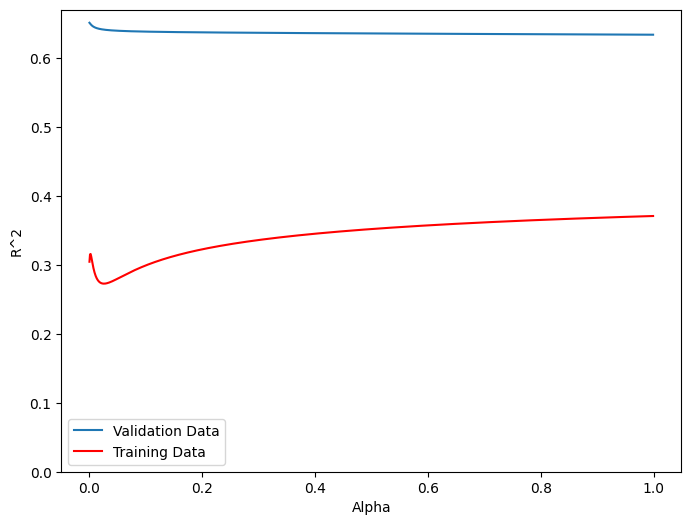

In [79]:
plt.figure(figsize=(8, 6))
plt.plot(Alpha, rsqu_test, label="Validation Data")
plt.plot(Alpha, rsqu_train, 'r', label="Training Data")
plt.xlabel("Alpha")
plt.ylabel("R^2")
plt.legend()
plt.ylim(0,)

In [83]:
parameters1 = [{"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}]

In [84]:
rr = Ridge()
grid1 = GridSearchCV(rr, parameters1, cv=4)

In [85]:
grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
                   'CPU_core', 'OS', 'GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [87]:
bestrr = grid1.best_estimator_
print(bestrr.score(x_test[['CPU_frequency', 'RAM_GB',
      'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_test))

0.2447803981790706
